In [53]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
# %matplotlib inline

In [54]:
#파일 불러오기

data = pd. read_excel('(양식)동별 데이터_통합 및 최종.xlsx')
print(data)

     행정동       사업체수_동별      종사자수__동별   유동인구1__점심시간대   유동인구2__3040         카페수  \
0    중앙동   8045.000000  66053.333333  149464.333333  12364.000000  293.333333   
1    동광동   5088.235294  19417.647059   91032.941176   7451.764706  300.000000   
2    대청동   1945.714286   9497.142857   64286.857143   5308.000000   62.857143   
3    보수동   2123.809524   5945.238095   59243.333333   5764.761905    7.142857   
4    부평동  10371.428571  25152.380952  167965.714286  14753.333333  404.761905   
..   ...           ...           ...            ...           ...         ...   
192  학장동    614.781022   3577.919708   18545.364964   1912.627737   21.532847   
193  엄궁동    480.990099   1820.594059   14027.287129   1730.297030   24.950495   
194  NaN           NaN           NaN            NaN           NaN         NaN   
195  NaN           NaN           NaN            NaN           NaN         NaN   
196  NaN           NaN           NaN            NaN           NaN         NaN   

            음식점수  헌혈의집 거리  

In [55]:
#결측치 제거

data = data.dropna()
print(data)

      행정동       사업체수_동별      종사자수__동별   유동인구1__점심시간대   유동인구2__3040  \
0     중앙동   8045.000000  66053.333333  149464.333333  12364.000000   
1     동광동   5088.235294  19417.647059   91032.941176   7451.764706   
2     대청동   1945.714286   9497.142857   64286.857143   5308.000000   
3     보수동   2123.809524   5945.238095   59243.333333   5764.761905   
4     부평동  10371.428571  25152.380952  167965.714286  14753.333333   
..    ...           ...           ...            ...           ...   
189  주례1동    936.601307   2558.823529   26154.509804   2766.797386   
190  주례2동    605.485232   3252.742616   28634.936709   2990.379747   
191  주례3동   1124.418605   4913.953488   60435.581395   6127.674419   
192   학장동    614.781022   3577.919708   18545.364964   1912.627737   
193   엄궁동    480.990099   1820.594059   14027.287129   1730.297030   

            카페수         음식점수  헌혈의집 거리  대중교통지수  
0    293.333333   906.666667    990.0  113.88  
1    300.000000  1582.352941   1600.0  119.55  
2     62.857143

In [56]:
#사전 정규화(0과 1사이의 값으로 모두 변경)

from sklearn.preprocessing import MinMaxScaler
list = data.drop('행정동', axis=1)
list= list.values.tolist()
scaler = MinMaxScaler()
scaler.fit(list)
data_scale = scaler.transform(list)
data_scale=pd.DataFrame(data=data_scale,columns=data.columns[1:9], index=data['행정동'])

data_scale.head()
data_scale

,사업체수_동별,종사자수__동별,유동인구1__점심시간대,유동인구2__3040,카페수,음식점수,헌혈의집 거리,대중교통지수
행정동,,,,,,,,
중앙동,0.698735,1.000000,0.696029,0.667336,0.168637,0.180370,0.042836,0.536508
동광동,0.441623,0.293225,0.422798,0.401361,0.172470,0.315110,0.075255,0.582662
대청동,0.168359,0.142878,0.297730,0.285286,0.036136,0.059393,0.039594,0.266667
보수동,0.183845,0.089048,0.274146,0.310017,0.004106,0.015238,0.059311,0.221001
부평동,0.901034,0.380137,0.782543,0.796708,0.232697,0.251209,0.022268,0.419048
...,...,...,...,...,...,...,...,...
주례1동,0.080609,0.037726,0.119420,0.147691,0.010521,0.020032,0.107143,0.170289
주례2동,0.051816,0.048243,0.131018,0.159797,0.040510,0.062254,0.245323,0.152951
주례3동,0.096941,0.073419,0.279721,0.329668,0.060832,0.113884,0.123087,0.110867


In [57]:
df = data_scale
df

,사업체수_동별,종사자수__동별,유동인구1__점심시간대,유동인구2__3040,카페수,음식점수,헌혈의집 거리,대중교통지수
행정동,,,,,,,,
중앙동,0.698735,1.000000,0.696029,0.667336,0.168637,0.180370,0.042836,0.536508
동광동,0.441623,0.293225,0.422798,0.401361,0.172470,0.315110,0.075255,0.582662
대청동,0.168359,0.142878,0.297730,0.285286,0.036136,0.059393,0.039594,0.266667
보수동,0.183845,0.089048,0.274146,0.310017,0.004106,0.015238,0.059311,0.221001
부평동,0.901034,0.380137,0.782543,0.796708,0.232697,0.251209,0.022268,0.419048
...,...,...,...,...,...,...,...,...
주례1동,0.080609,0.037726,0.119420,0.147691,0.010521,0.020032,0.107143,0.170289
주례2동,0.051816,0.048243,0.131018,0.159797,0.040510,0.062254,0.245323,0.152951
주례3동,0.096941,0.073419,0.279721,0.329668,0.060832,0.113884,0.123087,0.110867


In [58]:
df.columns = ['사업체수','종사자수','점심 유동인구','3040 유동인구','카페수','음식점수','헌혈의집 거리','대중교통 지수']

In [59]:
#헌혈의집 거리 보정(클수록 좋은 값 보정)

for i in range(len(data_scale)):
    data_scale.iloc[i,6] = 1 - data_scale.iloc[i,6]    

In [60]:
#엑셀 파일로 저장

data_scale.to_excel('(양식)동별 데이터_통합 및 최종2.xlsx')

In [61]:
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_diabetes
from plotly.offline import init_notebook_mode, iplot


df = data_scale
df = pd.DataFrame(df, columns=df.columns)
init_notebook_mode(connected=True)  

pca = PCA()
pca.fit(df)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "Number of Components", "y": "Explained Variance"}
)

In [62]:
# !pip install yellowbrick

In [63]:
from sklearn.decomposition import PCA

data_scale2 = data_scale
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(data_scale)

data_scale2['pca_1'] = pca_transformed[:,0]
data_scale2['pca_2'] = pca_transformed[:,1]
data_scale2['total_score'] = pca_transformed[:,0] + pca_transformed[:,1]
data_scale2 = data_scale2.sort_values(by='total_score' ,ascending=False)

data_scale2

,사업체수,종사자수,점심 유동인구,3040 유동인구,카페수,음식점수,헌혈의집 거리,대중교통 지수,pca_1,pca_2,total_score
행정동,,,,,,,,,,,
부전2동,0.573327,0.598731,1.000000,1.000000,1.000000,1.000000,0.983206,0.578510,1.752567,0.135968,1.888535
남포동,0.889751,0.475389,0.835321,0.707548,0.565317,0.526350,0.993835,0.586569,1.383583,0.015990,1.399573
연산5동,0.378599,0.563595,0.821470,0.940950,0.203426,0.491197,0.802509,0.328042,1.110228,0.231789,1.342016
중앙동,0.698735,1.000000,0.696029,0.667336,0.168637,0.180370,0.957164,0.536508,1.178849,0.023354,1.202203
부평동,0.901034,0.380137,0.782543,0.796708,0.232697,0.251209,0.977732,0.419048,1.162528,0.014305,1.176834
...,...,...,...,...,...,...,...,...,...,...,...
좌4동,0.007655,0.008166,0.041556,0.056806,0.001267,0.000229,0.871599,0.027025,-0.304754,-0.079731,-0.384485
하단1동,0.019459,0.014922,0.051095,0.066628,0.020608,0.039483,0.935374,0.087668,-0.244398,-0.141490,-0.385889
우1동,0.025739,0.022860,0.068794,0.092909,0.021807,0.026874,0.982887,0.089947,-0.213864,-0.183298,-0.397162


In [64]:
#엑셀 파일로 저장

data_scale2.to_excel('(양식)동별 데이터_통합 및 최종3.xlsx')

In [65]:
pca.explained_variance_ratio_

array([0.72903174, 0.10804167])

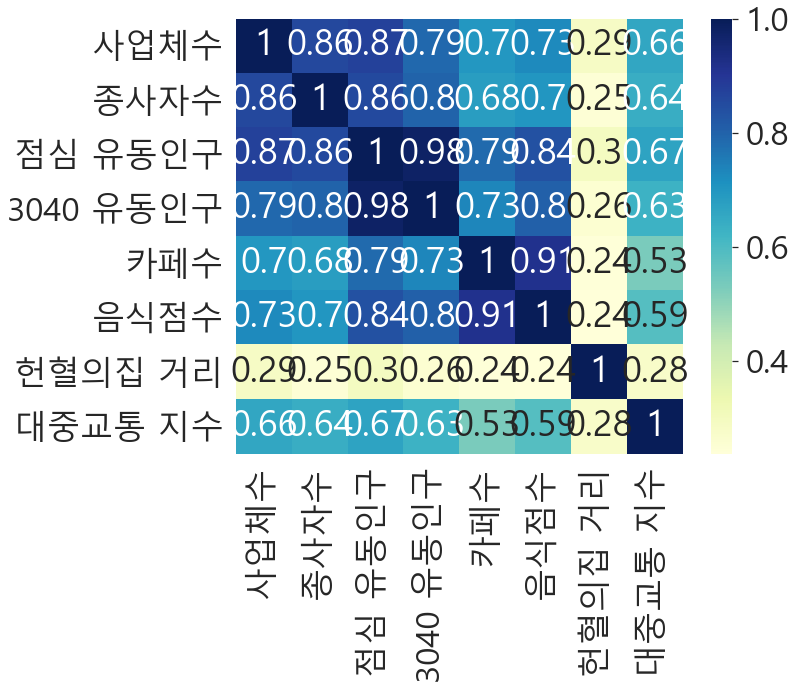

In [66]:
pcascore = df.iloc[:,[-2,-3]]
corrdata = df.drop(['pca_1','pca_2','total_score'], axis=1)

ax = sns.heatmap(corrdata.corr(),annot=True,cmap='YlGnBu')#,linewidths=0.2)
# ax.tick_params(fontsize=10)
# ax.set_xticklabels(fontsize = 16)
fig=plt.gcf() # fig에 접근
fig.set_size_inches(10,8) # fig그림 크기 조절
plt.show()

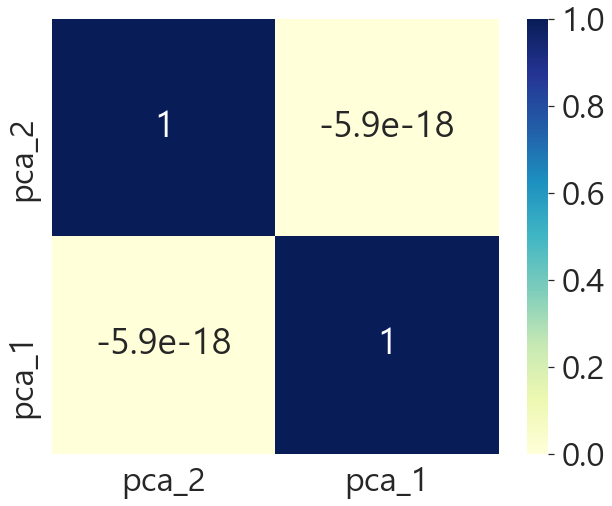

In [67]:
ax = sns.heatmap(pcascore.corr(),annot=True,cmap='YlGnBu')#,linewidths=0.2)
# ax.tick_params(fontsize=10)
# ax.set_xticklabels(fontsize = 16)
fig=plt.gcf() # fig에 접근
fig.set_size_inches(10,8) # fig그림 크기 조절
plt.show()

In [68]:
corrdata

,사업체수,종사자수,점심 유동인구,3040 유동인구,카페수,음식점수,헌혈의집 거리,대중교통 지수
행정동,,,,,,,,
중앙동,0.698735,1.000000,0.696029,0.667336,0.168637,0.180370,0.957164,0.536508
동광동,0.441623,0.293225,0.422798,0.401361,0.172470,0.315110,0.924745,0.582662
대청동,0.168359,0.142878,0.297730,0.285286,0.036136,0.059393,0.960406,0.266667
보수동,0.183845,0.089048,0.274146,0.310017,0.004106,0.015238,0.940689,0.221001
부평동,0.901034,0.380137,0.782543,0.796708,0.232697,0.251209,0.977732,0.419048
...,...,...,...,...,...,...,...,...
주례1동,0.080609,0.037726,0.119420,0.147691,0.010521,0.020032,0.892857,0.170289
주례2동,0.051816,0.048243,0.131018,0.159797,0.040510,0.062254,0.754677,0.152951
주례3동,0.096941,0.073419,0.279721,0.329668,0.060832,0.113884,0.876913,0.110867


In [69]:
import numpy as np
rankbyemployee_scale2 = corrdata
# rankbyemployee_scale2 = rankbyemployee_scale.drop(['점수합'], axis=1)
kmeans = KMeans(n_clusters=3,init='k-means++', max_iter=100, random_state=0).fit(rankbyemployee_scale2)
rankbyemployee_scale2['cluster'] = kmeans.labels_
rankbyemployee_scale2

,사업체수,종사자수,점심 유동인구,3040 유동인구,카페수,음식점수,헌혈의집 거리,대중교통 지수,cluster
행정동,,,,,,,,,
중앙동,0.698735,1.000000,0.696029,0.667336,0.168637,0.180370,0.957164,0.536508,2
동광동,0.441623,0.293225,0.422798,0.401361,0.172470,0.315110,0.924745,0.582662,2
대청동,0.168359,0.142878,0.297730,0.285286,0.036136,0.059393,0.960406,0.266667,0
보수동,0.183845,0.089048,0.274146,0.310017,0.004106,0.015238,0.940689,0.221001,0
부평동,0.901034,0.380137,0.782543,0.796708,0.232697,0.251209,0.977732,0.419048,2
...,...,...,...,...,...,...,...,...,...
주례1동,0.080609,0.037726,0.119420,0.147691,0.010521,0.020032,0.892857,0.170289,1
주례2동,0.051816,0.048243,0.131018,0.159797,0.040510,0.062254,0.754677,0.152951,1
주례3동,0.096941,0.073419,0.279721,0.329668,0.060832,0.113884,0.876913,0.110867,0


In [70]:
from sklearn.decomposition import PCA

corrdata = corrdata.drop('cluster',axis=1)
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(corrdata)

corrdata['pca_x'] = pca_transformed[:,0]
corrdata['pca_y'] = pca_transformed[:,1]
corrdata.head(3)

,사업체수,종사자수,점심 유동인구,3040 유동인구,카페수,음식점수,헌혈의집 거리,대중교통 지수,pca_x,pca_y
행정동,,,,,,,,,,
중앙동,0.698735,1.000000,0.696029,0.667336,0.168637,0.180370,0.957164,0.536508,1.178849,0.023354
동광동,0.441623,0.293225,0.422798,0.401361,0.172470,0.315110,0.924745,0.582662,0.630276,-0.049634
대청동,0.168359,0.142878,0.297730,0.285286,0.036136,0.059393,0.960406,0.266667,0.152903,-0.120242


In [71]:
corrdata['cluster'] = rankbyemployee_scale2['cluster'] 

In [72]:
rankbyemployee_scale2

,사업체수,종사자수,점심 유동인구,3040 유동인구,카페수,음식점수,헌혈의집 거리,대중교통 지수,cluster
행정동,,,,,,,,,
중앙동,0.698735,1.000000,0.696029,0.667336,0.168637,0.180370,0.957164,0.536508,2
동광동,0.441623,0.293225,0.422798,0.401361,0.172470,0.315110,0.924745,0.582662,2
대청동,0.168359,0.142878,0.297730,0.285286,0.036136,0.059393,0.960406,0.266667,0
보수동,0.183845,0.089048,0.274146,0.310017,0.004106,0.015238,0.940689,0.221001,0
부평동,0.901034,0.380137,0.782543,0.796708,0.232697,0.251209,0.977732,0.419048,2
...,...,...,...,...,...,...,...,...,...
주례1동,0.080609,0.037726,0.119420,0.147691,0.010521,0.020032,0.892857,0.170289,1
주례2동,0.051816,0.048243,0.131018,0.159797,0.040510,0.062254,0.754677,0.152951,1
주례3동,0.096941,0.073419,0.279721,0.329668,0.060832,0.113884,0.876913,0.110867,0


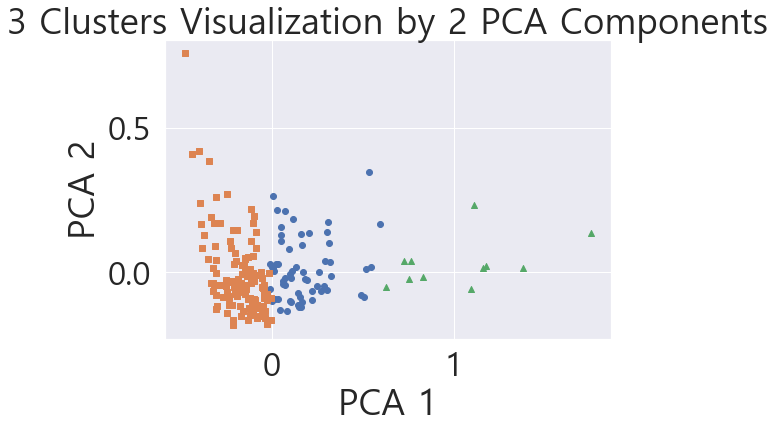

In [73]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
irisDF = rankbyemployee_scale2
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index


# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=corrdata.loc[marker0_ind,'pca_x'], y=corrdata.loc[marker0_ind,'pca_y'], marker='o') #동그라미
plt.scatter(x=corrdata.loc[marker1_ind,'pca_x'], y=corrdata.loc[marker1_ind,'pca_y'], marker='s') #네모
plt.scatter(x=corrdata.loc[marker2_ind,'pca_x'], y=corrdata.loc[marker2_ind,'pca_y'], marker='^') #세모
# plt.scatter(x=irisDF.loc[marker3_ind,'pca_x'], y=irisDF.loc[marker3_ind,'pca_y'], marker='*')


plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

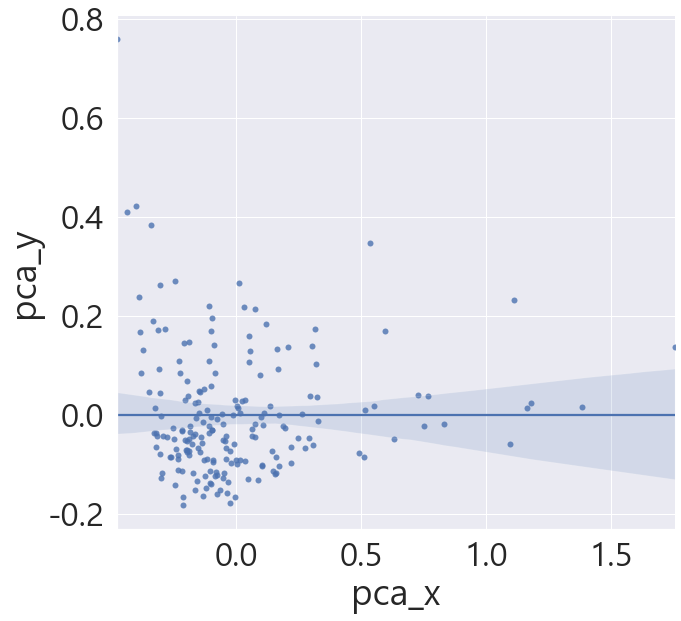

In [105]:
sns.set(font='Malgun Gothic', 
        rc={"axes.unicode_minus":False},
        style='darkgrid', font_scale=3)
ax = sns.lmplot(x='pca_x',y='pca_y',data=corrdata) #, alpha=0.5)
# sns.color_palette('magma')
# plt.rcParams['figure.figsize']= [30, 30]
fig=plt.gcf() # fig에 접근
fig.set_size_inches(15,13) # fig그림 크기 조절
# ax.set_xlabel('점심 유동인구', fontsize=40)
# ax.set_ylabel('3040 유동인구', fontsize=40)  
#diag_kind='hist')
plt.show()

In [74]:
subset = rankbyemployee_scale2
tuples = [tuple(x) for x in subset.to_numpy()]
tuples

[(0.6987349276065021,
  1.0,
  0.6960288373680467,
  0.6673363228699553,
  0.16863697705802969,
  0.18036993286972078,
  0.9571641156462585,
  0.5365079365079366,
  2.0),
 (0.4416231332757769,
  0.29322542264914564,
  0.4227976781679139,
  0.40136102584575006,
  0.17246963562753034,
  0.31510987385301786,
  0.9247448979591837,
  0.5826617826617827,
  2.0),
 (0.1683585026525997,
  0.1428778942997533,
  0.2977302567902076,
  0.2852858746656221,
  0.036136495083863504,
  0.05939332886440404,
  0.960406037414966,
  0.2666666666666667,
  0.0),
 (0.1838451547143368,
  0.08904795874120106,
  0.2741462241998116,
  0.3100174634463691,
  0.00410641989589358,
  0.015237817983342604,
  0.940688775510204,
  0.2210012210012211,
  0.0),
 (0.9010344961830171,
  0.38013663694929956,
  0.7825431848416003,
  0.7967079032142796,
  0.2326971274339695,
  0.25120866645525153,
  0.9777317176870748,
  0.4190476190476191,
  2.0),
 (0.9999999999999999,
  0.43411812481335255,
  0.6366977851205288,
  0.52293808495

In [75]:
load_concrete()

(      cement   slag    ash  water  splast  coarse   fine  age
 0      540.0    0.0    0.0  162.0     2.5  1040.0  676.0   28
 1      540.0    0.0    0.0  162.0     2.5  1055.0  676.0   28
 2      332.5  142.5    0.0  228.0     0.0   932.0  594.0  270
 3      332.5  142.5    0.0  228.0     0.0   932.0  594.0  365
 4      198.6  132.4    0.0  192.0     0.0   978.4  825.5  360
 ...      ...    ...    ...    ...     ...     ...    ...  ...
 1025   276.4  116.0   90.3  179.6     8.9   870.1  768.3   28
 1026   322.2    0.0  115.6  196.0    10.4   817.9  813.4   28
 1027   148.5  139.4  108.6  192.7     6.1   892.4  780.0   28
 1028   159.1  186.7    0.0  175.6    11.3   989.6  788.9   28
 1029   260.9  100.5   78.3  200.6     8.6   864.5  761.5   28
 
 [1030 rows x 8 columns],
 0       79.986111
 1       61.887366
 2       40.269535
 3       41.052780
 4       44.296075
           ...    
 1025    44.284354
 1026    31.178794
 1027    23.696601
 1028    32.768036
 1029    32.401235
 Name: 

C:\Users\maxha\anaconda3\lib\site-packages\yellowbrick\features\pca.py:448: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



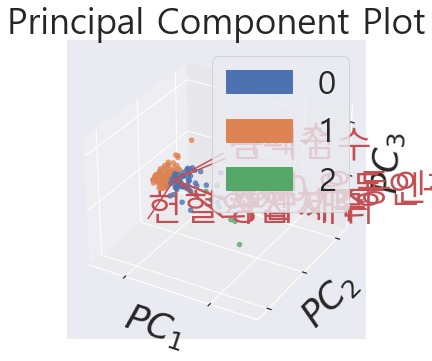

<Axes3DSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [76]:
from yellowbrick.datasets import load_concrete
from yellowbrick.features import PCA
from yellowbrick.features import RadViz


X= rankbyemployee_scale2.iloc[:,:-2]
y = rankbyemployee_scale2.iloc[:,-1]

visualizer = PCA(scale=True, proj_features=True, projection=3)
visualizer.fit_transform(X, y)
visualizer.show()

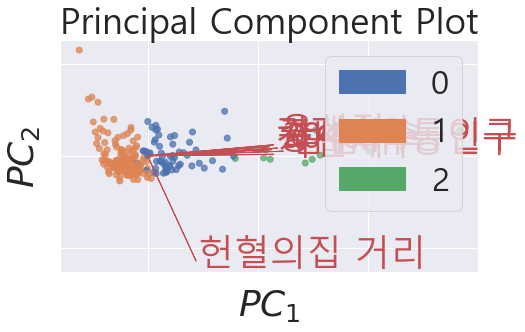

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [77]:
from yellowbrick.datasets import load_concrete
from yellowbrick.features import PCA

# Load the concrete dataset
X= rankbyemployee_scale2.iloc[:,:-2]
y = rankbyemployee_scale2.iloc[:,-1]

visualizer = PCA(scale=True, proj_features=True)
visualizer.fit_transform(X, y)
visualizer.show()

In [78]:
data_scale.to_excel('(ppt용 pca.xlsx')

In [79]:
 rankbyemployee_scale2 [rankbyemployee_scale2.iloc[:,-1] == 2]

,사업체수,종사자수,점심 유동인구,3040 유동인구,카페수,음식점수,헌혈의집 거리,대중교통 지수,cluster
행정동,,,,,,,,,
중앙동,0.698735,1.000000,0.696029,0.667336,0.168637,0.180370,0.957164,0.536508,2
동광동,0.441623,0.293225,0.422798,0.401361,0.172470,0.315110,0.924745,0.582662,2
부평동,0.901034,0.380137,0.782543,0.796708,0.232697,0.251209,0.977732,0.419048,2
광복동,1.000000,0.434118,0.636698,0.522938,0.202583,0.359461,0.999150,0.578592,2
남포동,0.889751,0.475389,0.835321,0.707548,0.565317,0.526350,0.993835,0.586569,2
충무동,0.422434,0.271454,0.546171,0.539805,0.178685,0.507801,0.956633,0.417420,2
초량1동,0.386124,0.548265,0.486516,0.516179,0.163625,0.279513,0.876913,0.480830,2
범일2동,0.546052,0.415222,0.542037,0.500339,0.279830,0.252799,0.887543,0.416606,2
부전2동,0.573327,0.598731,1.000000,1.000000,1.000000,1.000000,0.983206,0.578510,2


In [80]:
data_scale.to_excel('(분석1 ppt용 kmeans 선정 데이터 .xlsx')

In [81]:
df.iloc[:,[1,6]]

,종사자수,헌혈의집 거리
행정동,,
중앙동,1.000000,0.957164
동광동,0.293225,0.924745
대청동,0.142878,0.960406
보수동,0.089048,0.940689
부평동,0.380137,0.977732
...,...,...
주례1동,0.037726,0.892857
주례2동,0.048243,0.754677
주례3동,0.073419,0.876913


KeyError: '사업체수_동별'

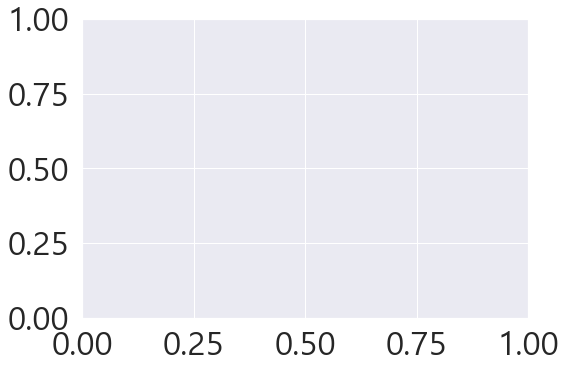

In [82]:
df.plot.scatter(x='헌혈의집 거리', y='사업체수_동별') # c=col)
i = 0

for x,y in zip(df['헌혈의집 거리'],df['사업체수_동별']):
    label = df.index[i]
    i  +=  1
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                fontsize=15) # horizontal align

fig=plt.gcf() # fig에 접근
fig.set_size_inches(30,30) # fig그림 크기 조절   
plt.show()

AttributeError: 'PairGrid' object has no attribute 'tick_params'

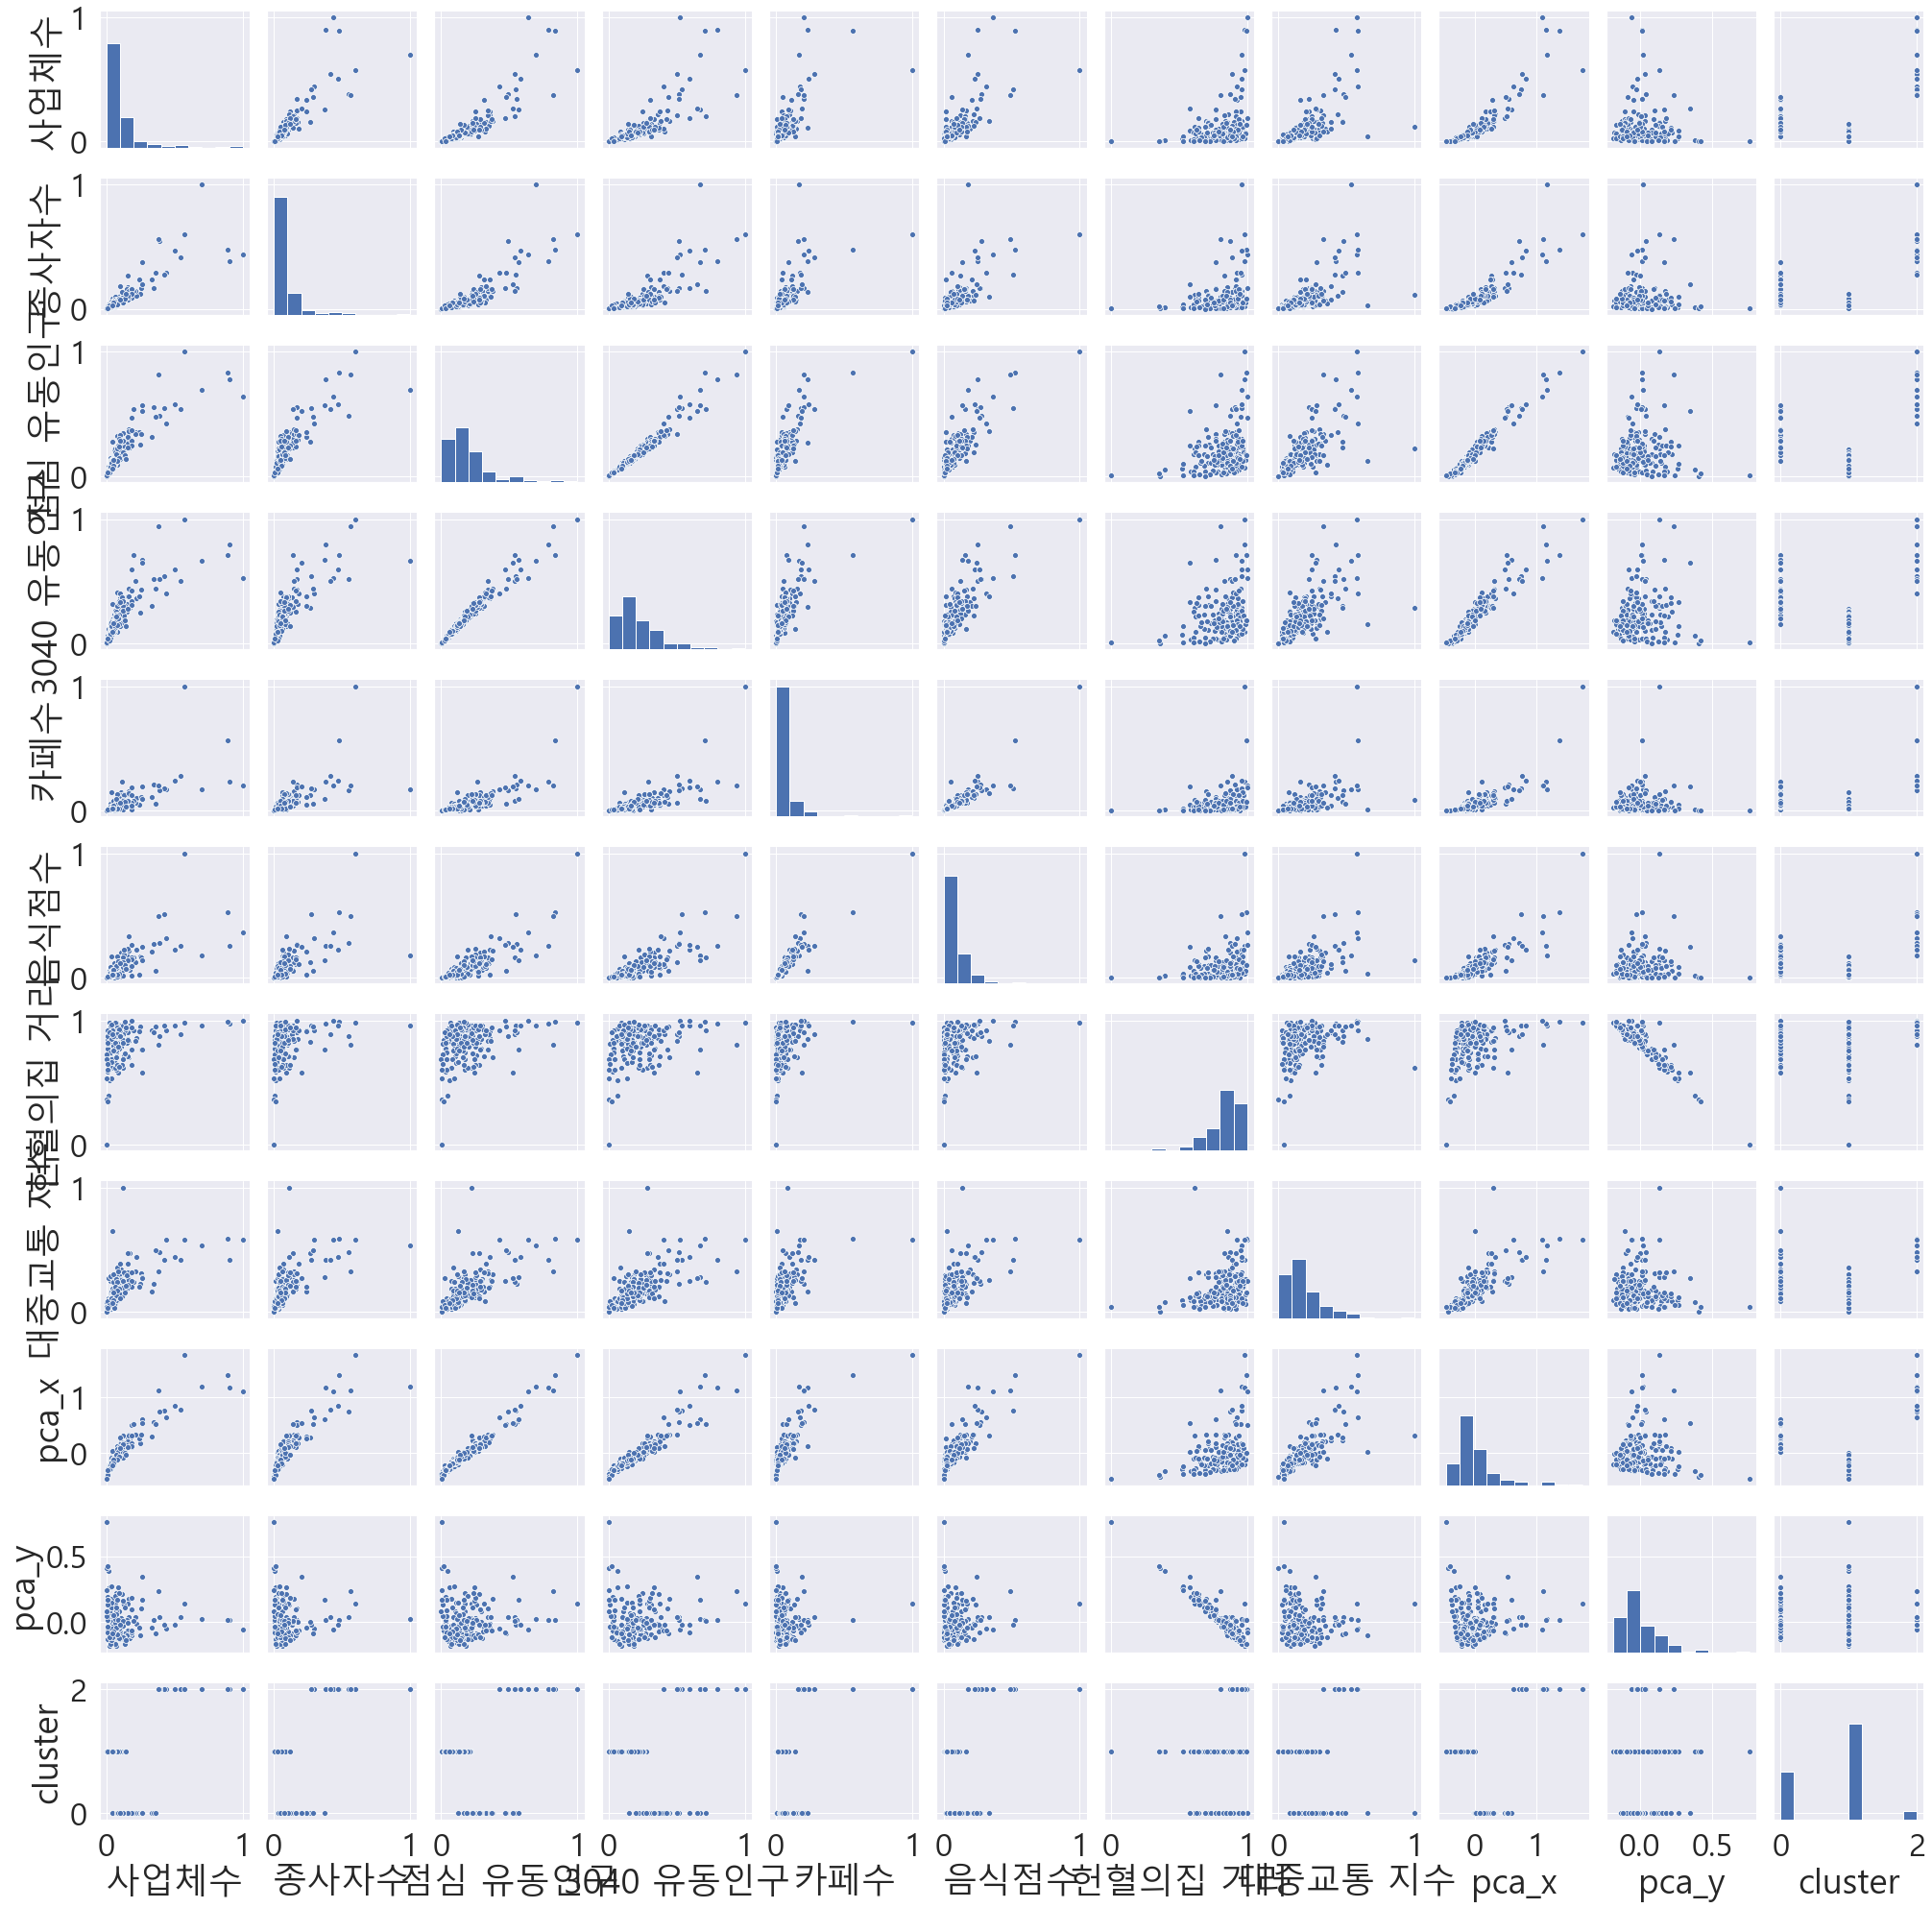

In [83]:
ax = sns.pairplot(corrdata, diag_kind='hist')
fig=plt.gcf() # fig에 접근
ax.tick_params(fontsize=10)
ax.set_xticklabels(fontsize = 16)
fig.set_size_inches(13,13) # fig그림 크기 조절
plt.show()

In [ ]:
sns.set(font='Malgun Gothic', 
        rc={"axes.unicode_minus":False},
        style='darkgrid', font_scale=3)
ax = sns.lmplot(x='점심 유동인구',y='3040 유동인구',data=df) #, alpha=0.5)
# sns.color_palette('magma')
# plt.rcParams['figure.figsize']= [30, 30]
fig=plt.gcf() # fig에 접근
fig.set_size_inches(15,13) # fig그림 크기 조절
# ax.set_xlabel('점심 유동인구', fontsize=40)
# ax.set_ylabel('3040 유동인구', fontsize=40)  
#diag_kind='hist')
plt.show()

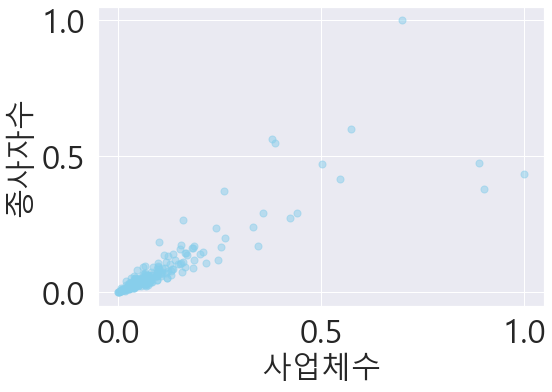

In [85]:
ax=df.plot(kind='scatter', x='사업체수', y='종사자수', s=50, color='skyblue', alpha=0.5) # marker color by grou
plt.rcParams['figure.figsize']= [10,10]
ax.set_xlabel('사업체수', fontsize=30)
ax.set_ylabel('종사자수', fontsize=30)  
plt.show()

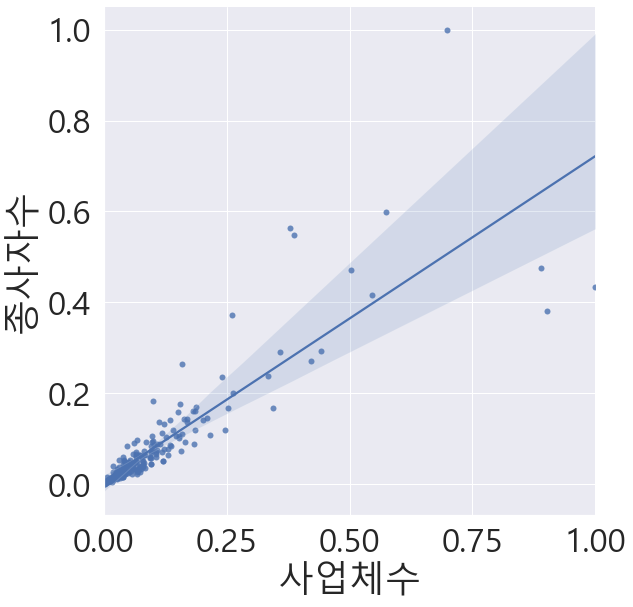

In [84]:
sns.set(font='Malgun Gothic', 
        rc={"axes.unicode_minus":False},
        style='darkgrid', font_scale=3)
ax = sns.lmplot(x='사업체수',y='종사자수',data=df) #, alpha=0.5)
# sns.color_palette('magma')
# plt.rcParams['figure.figsize']= [30, 30]
fig=plt.gcf() # fig에 접근
fig.set_size_inches(15,13) # fig그림 크기 조절
# ax.set_xlabel('점심 유동인구', fontsize=40)
# ax.set_ylabel('3040 유동인구', fontsize=40)  
#diag_kind='hist')
plt.show()

In [ ]:
rankbyemployee = pd.read_csv('부산시 3040 직장인 거주 1차 선정 지역(결측치 제거).csv', encoding='cp949')

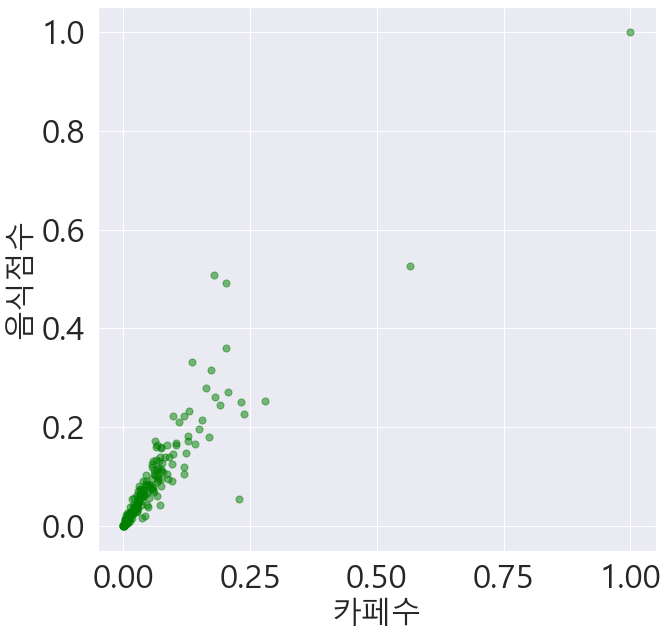

In [86]:
ax=df.plot(kind='scatter', x='카페수', y='음식점수', s=50, color='green', alpha=0.5) # marker color by grou
plt.rcParams['figure.figsize']= [10,10]
ax.set_xlabel('카페수', fontsize=30)
ax.set_ylabel('음식점수', fontsize=30)  
plt.show()

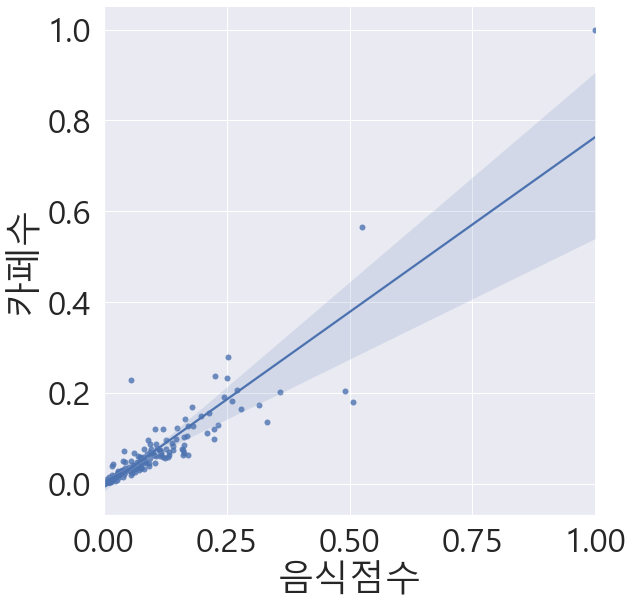

In [87]:
sns.set(font='Malgun Gothic', 
        rc={"axes.unicode_minus":False},
        style='darkgrid', font_scale=3)
ax = sns.lmplot(x='음식점수',y='카페수',data=df) #, alpha=0.5)
# sns.color_palette('magma')
# plt.rcParams['figure.figsize']= [30, 30]
fig=plt.gcf() # fig에 접근
fig.set_size_inches(15,13) # fig그림 크기 조절
# ax.set_xlabel('점심 유동인구', fontsize=40)
# ax.set_ylabel('3040 유동인구', fontsize=40)  
#diag_kind='hist')
plt.show()

In [88]:
rankbyemployee.index = rankbyemployee['행정동']
rankbyemployee=rankbyemployee.drop('행정동', axis=1)
rankbyemployee.head()

NameError: name 'rankbyemployee' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# rankbyemployee = pd.to_numeric(rankbyemployee['종사자수'])
# rankbyemployee = pd.to_numeric(rankbyemployee['음식점_수_동별_'])
# rankbyemployee = pd.to_numeric(rankbyemployee['3040_유동인구'])
# list =list([rankbyemployee['종사자수'], rankbyemployee['음식점_수__동별_'],rankbyemployee['3040_유동인구'] )
list= rankbyemployee.values.tolist()
# StandardScaler객체 생성
scaler = MinMaxScaler()
# StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(list)
rankbyemployee_scale = scaler.transform(list)
rankbyemployee_scale=pd.DataFrame(data=rankbyemployee_scale,columns=rankbyemployee.columns, index=rankbyemployee.index)

rankbyemployee_scale.head()